### Importing Liberaries & Cleanning The Dataset

In [2]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

df_original = pd.read_csv(r'C:\Users\Mohamed Fawzi\Desktop\Netflix Content Strategy\netflix_content.csv')

df = df_original.copy()

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24812 entries, 0 to 24811
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Title                24812 non-null  object
 1   Available Globally?  24812 non-null  object
 2   Release Date         8166 non-null   object
 3   Hours Viewed         24812 non-null  object
 4   Language Indicator   24812 non-null  object
 5   Content Type         24812 non-null  object
dtypes: object(6)
memory usage: 1.1+ MB


In [3]:
df.head(2)

,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type
0,The Night Agent: Season 1,Yes,2023-03-23,"81,21,00,000",English,Show
1,Ginny & Georgia: Season 2,Yes,2023-01-05,"66,51,00,000",English,Show


-   Notice that the Hours Viewed column dtype is not a numerical format, we need to convert it to a float instead

In [4]:
# converting the column to a float instead of a string
df['Hours Viewed'] = df['Hours Viewed'].replace(',', '', regex=True).astype(float)

df['Hours Viewed'].head()

0    812100000.0
1    665100000.0
2    622800000.0
3    507700000.0
4    503000000.0
Name: Hours Viewed, dtype: float64

In [5]:
# Convert the 'Release Date' column to datetime
df['Release Date'] = pd.to_datetime(df['Release Date'])

# Extract year, month, and day from the 'Release Date' column
df['Year'] = df['Release Date'].dt.year
df['Month'] = df['Release Date'].dt.month
df['Day'] = df['Release Date'].dt.day


In [6]:
# convert the Year column to an integer
df['Year'] = pd.to_numeric(df['Year'], errors='coerce').fillna(0).astype(int)

# Convert the Month column to an integer
df['Month'] = pd.to_numeric(df['Month'], errors='coerce').fillna(0).astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24812 entries, 0 to 24811
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Title                24812 non-null  object        
 1   Available Globally?  24812 non-null  object        
 2   Release Date         8166 non-null   datetime64[ns]
 3   Hours Viewed         24812 non-null  float64       
 4   Language Indicator   24812 non-null  object        
 5   Content Type         24812 non-null  object        
 6   Year                 24812 non-null  int32         
 7   Month                24812 non-null  int32         
 8   Day                  8166 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int32(2), object(4)
memory usage: 1.5+ MB


### Dataset Exploration (EDA):
-   ### Points to Explore:
    -   1. Global Availability Analysis
    -   2. Release Date Analysis
    -   3. Hours Viewed Analysis
    -   4. Language Analysis
    -   5. Seasonal Analysis
    -   6. Correlation Analysis

#### 5. Correlation Analysis:
- 

    

In [7]:
df.head(2)

,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type,Year,Month,Day
0,The Night Agent: Season 1,Yes,2023-03-23,812100000.0,English,Show,2023,3,23.0
1,Ginny & Georgia: Season 2,Yes,2023-01-05,665100000.0,English,Show,2023,1,5.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24812 entries, 0 to 24811
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Title                24812 non-null  object        
 1   Available Globally?  24812 non-null  object        
 2   Release Date         8166 non-null   datetime64[ns]
 3   Hours Viewed         24812 non-null  float64       
 4   Language Indicator   24812 non-null  object        
 5   Content Type         24812 non-null  object        
 6   Year                 24812 non-null  int32         
 7   Month                24812 non-null  int32         
 8   Day                  8166 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int32(2), object(4)
memory usage: 1.5+ MB


#### Testing

In [13]:
# Creating Month Name Column from the Month column
month_dict = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr',
    5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug',
    9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}

df['Month Name'] = df['Month'].map(month_dict)

In [18]:
df_corr = df[['Hours Viewed', 'Month', 'Month Name']]

df_corr = df_corr[df_corr['Month'] > 0]

df_corr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8166 entries, 0 to 24810
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Hours Viewed  8166 non-null   float64
 1   Month         8166 non-null   int32  
 2   Month Name    8166 non-null   object 
dtypes: float64(1), int32(1), object(1)
memory usage: 223.3+ KB


In [21]:
# 9. Correlation Analysis
correlation_hours_release = df_corr['Hours Viewed'].corr(df_corr['Month'].astype('int64'))

correlation_hours_release

-0.007865941487631338

In [24]:
# Create a new DataFrame with the columns of interest
corr_df = df_corr[['Hours Viewed', 'Month']]
#corr_df['Release Date'].dropna()
#corr_df.info()

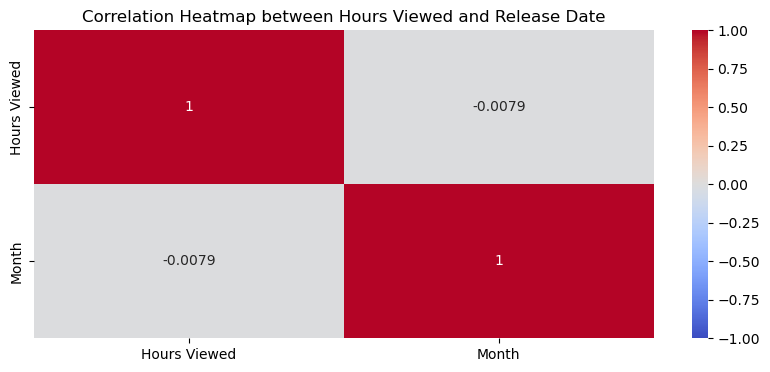

In [25]:


# Calculate the correlation matrix
correlation_matrix = corr_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 4))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    vmin=-1,
    vmax=1
)

plt.title('Correlation Heatmap between Hours Viewed and Release Date')
plt.show()